In [7]:
#Dependencies

import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from datetime import datetime, timedelta
import csv
import matplotlib.dates as mdates

In [14]:
#Data files
newyork2019_county_path = "Resources/newyorkcountydata2019.csv"

#Ready the data
newyork2019_county = pd.read_csv(newyork_county_path)

#Display
newyork2019_county.head()

,region_name,region_type,period_begin,period_end,duration,total_homes_sold,total_homes_sold_yoy,average_homes_sold,average_homes_sold_yoy,total_homes_sold_with_price_drops,...,median_days_on_market_yoy,pending_sales_to_sales_ratio,pending_sales_to_sales_ratio_yoy,months_of_supply,months_of_supply_yoy,average_pending_sales_listing_updates,average_pending_sales_listing_updates_yoy,percent_total_price_drops_of_inventory,percent_total_price_drops_of_inventory_yoy,last_updated
0,"New York County, NY",county,1/7/2019,2/3/2019,4 weeks,612,-0.109170,153,-0.105263,8,...,4.4,0.091390,0.003815,59.026188,7.641490,20,0.818182,0.035116,0.020940,3/10/2021 14:56
1,"New York County, NY",county,1/14/2019,2/10/2019,4 weeks,629,-0.075000,157,-0.076471,11,...,7.1,0.072973,-0.019657,57.024114,4.781175,10,-0.285714,0.019549,0.002464,3/10/2021 14:56
2,"New York County, NY",county,1/21/2019,2/17/2019,4 weeks,607,-0.139007,151,-0.142045,11,...,7.2,0.059220,-0.024565,58.929242,8.278517,11,-0.388889,0.019004,-0.005464,3/10/2021 14:56
3,"New York County, NY",county,1/28/2019,2/24/2019,4 weeks,607,-0.080303,151,-0.084848,11,...,21.6,0.077077,-0.008397,58.716940,2.425202,13,0.181818,0.018841,0.003010,3/10/2021 14:56
4,"New York County, NY",county,2/4/2019,3/3/2019,4 weeks,628,-0.066865,157,-0.065476,11,...,38.3,0.077630,-0.010823,57.292515,1.352231,14,-0.066667,0.018797,-0.000956,3/10/2021 14:56


In [15]:
#Rename Columns
newyork2019_county.rename(columns = {'region_name':'Region Name',
                                  'region_type': 'Region Type',
                                  'period_begin': 'Period Begin',
                                  'period_end':'Period End',
                                  'duration':'Duration',
                                  'total_homes_sold':'Total Homes Sold',
                                  'total_homes_sold_yoy':'Total Homes Sold Year over Year',
                                  'average_homes_sold':'Average Homes Sold',
                                  'average_homes_sold_yoy':'Average Homes Sold Year over Year',
                                  'total_homes_sold_with_price_drops':'Total Homes Sold with Price Drops',
                                  'total_homes_sold_with_price_drops_yoy':'Total Homes Sold with Price Drops Year over Year',
                                  'average_homes_sold_with_price_drops':'Average Homes Sold with Price Drops',
                                  'average_homes_sold_with_price_drops_yoy':'Average Homes Sold with Price Drops Year over Year'
                                  
                                 })

,Region Name,Region Type,Period Begin,Period End,Duration,Total Homes Sold,Total Homes Sold Year over Year,Average Homes Sold,Average Homes Sold Year over Year,Total Homes Sold with Price Drops,...,median_days_on_market_yoy,pending_sales_to_sales_ratio,pending_sales_to_sales_ratio_yoy,months_of_supply,months_of_supply_yoy,average_pending_sales_listing_updates,average_pending_sales_listing_updates_yoy,percent_total_price_drops_of_inventory,percent_total_price_drops_of_inventory_yoy,last_updated
0,"New York County, NY",county,1/7/2019,2/3/2019,4 weeks,612,-0.109170,153,-0.105263,8,...,4.4,0.091390,0.003815,59.026188,7.641490,20,0.818182,0.035116,0.020940,3/10/2021 14:56
1,"New York County, NY",county,1/14/2019,2/10/2019,4 weeks,629,-0.075000,157,-0.076471,11,...,7.1,0.072973,-0.019657,57.024114,4.781175,10,-0.285714,0.019549,0.002464,3/10/2021 14:56
2,"New York County, NY",county,1/21/2019,2/17/2019,4 weeks,607,-0.139007,151,-0.142045,11,...,7.2,0.059220,-0.024565,58.929242,8.278517,11,-0.388889,0.019004,-0.005464,3/10/2021 14:56
3,"New York County, NY",county,1/28/2019,2/24/2019,4 weeks,607,-0.080303,151,-0.084848,11,...,21.6,0.077077,-0.008397,58.716940,2.425202,13,0.181818,0.018841,0.003010,3/10/2021 14:56
4,"New York County, NY",county,2/4/2019,3/3/2019,4 weeks,628,-0.066865,157,-0.065476,11,...,38.3,0.077630,-0.010823,57.292515,1.352231,14,-0.066667,0.018797,-0.000956,3/10/2021 14:56
5,"New York County, NY",county,2/11/2019,3/10/2019,4 weeks,607,-0.095380,151,-0.095808,8,...,19.3,0.102148,0.010524,59.440562,2.861220,16,0.230769,0.021195,0.004565,3/10/2021 14:56
6,"New York County, NY",county,2/18/2019,3/17/2019,4 weeks,616,-0.034483,154,-0.031447,11,...,17.6,0.121264,0.022874,58.809696,-1.251326,16,0.600000,0.021691,0.013324,3/10/2021 14:56
7,"New York County, NY",county,2/25/2019,3/24/2019,4 weeks,657,-0.025223,164,-0.023810,8,...,16.6,0.106507,0.024159,54.904020,-1.471690,16,0.777778,0.021784,0.013649,3/10/2021 14:56
8,"New York County, NY",county,3/4/2019,3/31/2019,4 weeks,628,-0.064083,157,-0.059880,11,...,14.2,0.112879,0.008616,57.162453,0.025808,16,-0.200000,0.022321,0.006738,3/10/2021 14:56
9,"New York County, NY",county,3/11/2019,4/7/2019,4 weeks,652,0.004622,163,0.006173,13,...,22.9,0.157004,0.020595,55.623542,-4.204745,16,-0.515152,0.021948,-0.006007,3/10/2021 14:56


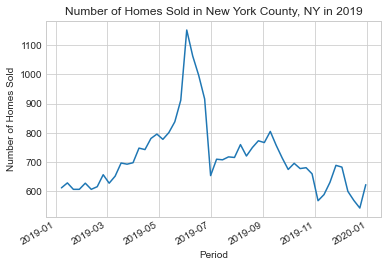

In [16]:
#Generate Line Plot of Total Homes Sold in 2019
plt.style.use('seaborn-whitegrid')
dates = newyork2019_county['period_begin']
dates = pd.to_datetime(dates)
plt.plot(dates,newyork2019_county['total_homes_sold'])
plt.gcf().autofmt_xdate()
plt.xlabel('Period')
plt.ylabel('Number of Homes Sold')
plt.title('Number of Homes Sold in New York County, NY in 2019')
plt.savefig("abigail/homessold2019.png")
plt.show()